##Методические указания

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [1]:
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()
X=iris.data
y=iris.target

In [ ]:
iris_data = pd.DataFrame(iris['data'], columns=iris['feature_names'])
name_map = {0: 'Iris-setosa', 1: 'Iris-versicolor', 2:'Iris-virginica'}
iris_data['class'] = [name_map[k] for k in iris['target']]
iris_data.head(10)

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=5)

In [6]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train) #Обучение трейновой выборке
y_pred = model.predict(X_test) #Предсказание для тестовой выборки
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred, average='macro'))

0.8260869565217391
0.7999999999999999


<Axes: >

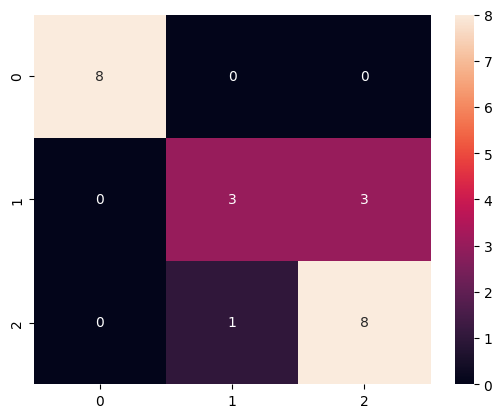

In [9]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)
model = LogisticRegression()
model.fit(X_train, y_train) #Обучение трейновой выборке
y_pred = model.predict(X_test) #Предсказание для тестовой выборки
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred, average='macro'))

1.0
1.0


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=8)
model = LogisticRegression()
model.fit(X_train, y_train) #Обучение трейновой выборке
y_pred = model.predict(X_test) #Предсказание для тестовой выборки
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred, average='macro'))

0.8695652173913043
0.8745098039215686


In [12]:
from sklearn.model_selection import KFold,StratifiedKFold,LeaveOneOut, cross_val_score

In [13]:
kf = KFold(n_splits = 3,shuffle=True, random_state=15)
kf

KFold(n_splits=3, random_state=15, shuffle=True)

In [14]:
for i, (train_index, test_index) in enumerate(kf.split(y)):
    print("Fold {}: Длинна train: {}, Длинна test: {}".format(i+1, len(train_index), len(test_index)))
    print('Train: index={}\n Test:  index={}'.format(train_index, test_index))

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

Fold 1: Длинна train: 100, Длинна test: 50
Train: index=[  1   2   3   4   7  10  14  15  16  17  18  19  22  23  24  26  28  29
  32  33  34  35  37  38  39  40  41  42  43  44  45  46  49  50  51  52
  53  54  56  60  62  63  64  65  66  68  69  70  73  75  76  77  79  80
  81  82  83  85  87  88  91  92  93  94  96  99 101 102 104 105 106 107
 108 110 111 113 114 117 118 119 120 121 123 125 128 131 132 133 134 135
 136 137 139 140 141 142 144 145 146 147]
 Test:  index=[  0   5   6   8   9  11  12  13  20  21  25  27  30  31  36  47  48  55
  57  58  59  61  67  71  72  74  78  84  86  89  90  95  97  98 100 103
 109 112 115 116 122 124 126 127 129 130 138 143 148 149]
Fold 2: Длинна train: 100, Длинна test: 50
Train: index=[  0   1   4   5   6   7   8   9  10  11  12  13  15  17  19  20  21  22
  23  24  25  26  27  28  30  31  34  36  37  39  40  41  42  44  47  48
  50  53  55  56  57  58  59  60  61  62  63  65  66  67  70  71  72  74
  75  78  79  84  85  86  89  90  95  96  97

In [15]:
metrics_accuracy = []
metrics_f1 = []
model = LogisticRegression(solver='liblinear')
for i, (train_index, test_index) in enumerate(kf.split(y)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    metrics_accuracy.append(accuracy_score(y_test, y_pred))
    metrics_f1.append(f1_score(y_test, y_pred, average='macro'))

In [16]:
print('Значения метрики accuracy: {} \nЗначения метрики f1: {}'.format(metrics_accuracy, metrics_f1))

Значения метрики accuracy: [0.96, 0.96, 0.9] 
Значения метрики f1: [0.9595588235294118, 0.9629629629629629, 0.890652557319224]


In [17]:
import numpy as np
print("Среднее по кросс-валидации: ", np.array(metrics_f1).mean())

Среднее по кросс-валидации:  0.9377247812705329


In [18]:
cv_results = cross_val_score(model,                  # модель
                             X,                      # матрица признаков
                             y,                      # вектор цели
                             cv = kf,                # тип разбиения (можно указать просто число фолдов cv = 3)
                             scoring = 'accuracy',   # метрика
                             n_jobs=-1)              # используются все ядра CPU

print("Кросс-валидация: ", cv_results)
print("Среднее по кросс-валидации: ", cv_results.mean())
print("Дисперсия по кросс-валидации: ", cv_results.std())

Кросс-валидация:  [0.96 0.96 0.9 ]
Среднее по кросс-валидации:  0.94
Дисперсия по кросс-валидации:  0.028284271247461874


In [19]:
skf = StratifiedKFold(n_splits=3,shuffle=True, random_state=15)
skf.get_n_splits(X, y)

3

In [20]:
for i, (train_index, test_index) in enumerate(skf.split(X,y)):
    print(f"Fold {i+1}:")
    print('Train: index={}\n Test:  index={}'.format(train_index, test_index))

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

Fold 1:
Train: index=[  0   1   2   3   4   5   7   8   9  12  14  15  16  17  18  19  21  23
  24  25  26  28  29  31  32  36  37  38  39  40  41  44  45  51  52  53
  54  55  60  61  62  63  65  66  68  70  72  75  77  80  81  82  83  84
  85  86  87  89  90  91  93  94  95  96  97  98 101 102 103 104 105 107
 110 111 112 113 114 116 118 121 122 123 124 126 127 128 129 132 133 134
 139 140 141 142 143 144 145 146 147 149]
 Test:  index=[  6  10  11  13  20  22  27  30  33  34  35  42  43  46  47  48  49  50
  56  57  58  59  64  67  69  71  73  74  76  78  79  88  92  99 100 106
 108 109 115 117 119 120 125 130 131 135 136 137 138 148]
Fold 2:
Train: index=[  0   1   2   4   5   6   9  10  11  13  14  15  16  19  20  21  22  23
  26  27  28  29  30  31  33  34  35  42  43  46  47  48  49  50  51  54
  55  56  57  58  59  61  63  64  66  67  69  70  71  73  74  75  76  78
  79  83  84  87  88  89  90  91  92  94  96  97  99 100 101 103 105 106
 107 108 109 110 114 115 116 117 118 119 

In [21]:
cv_results = cross_val_score(model,                  # модель
                             X,                      # матрица признаков
                             y,                      # вектор цели
                             cv = skf,           # тип разбиения
                             scoring = 'f1_macro',   # метрика
                             n_jobs=-1)              # используются все ядра CPU

print("Кросс-валидация: ", cv_results)
print("Среднее по кросс-валидации: ", cv_results.mean())

Кросс-валидация:  [1.         1.         0.92046784]
Среднее по кросс-валидации:  0.9734892787524366


In [22]:
loo = LeaveOneOut()

In [23]:
for i, (train_index, test_index) in enumerate(loo.split(X)):
    print(f"Fold {i+1}:")
    print('Train: index={}\n Test:  index={}'.format(train_index, test_index))

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

Fold 1:
Train: index=[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149]
 Test:  index=[0]
Fold 2:
Train: index=[  0   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  

In [24]:
cv_results = cross_val_score(model,                  # модель
                             X,                      # матрица признаков
                             y,                      # вектор цели
                             cv = loo,           # тип разбиения
                             scoring = 'f1_macro',   # метрика
                             n_jobs=-1)              # используются все ядра CPU

print("Кросс-валидация: ", cv_results)
print("Среднее по кросс-валидации: ", cv_results.mean())

Кросс-валидация:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
Среднее по кросс-валидации:  0.9533333333333334


##Задания для самостоятельного выполнения

#### 1. Загрузите датасет ирисы Фишера из библиотеки sklearn.datasets.

In [26]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

X, y


(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
        [5

#### 2. Сделайте hold-out разбиение данных. Для этого разделите данные на обучающую и валидационную выборки и выведите на экран соответствующие индексы разбиения.

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2, random_state=42)

# Получение индексов обучающей и валидационной выборок
train_indexes = X_train.index if hasattr(X_train, 'index') else range(len(X_train))
validation_indexes = X_validation.index if hasattr(X_validation, 'index') else range(len(X_train), len(X_train) + len(X_validation))

train_indexes, validation_indexes


(range(0, 120), range(120, 150))

####3. Теперь сделайте разбиение перемешанных данных, зафиксировав воспроизводимость выбора данных после перемешивания, указав значение параметра random_state=42 и выведите на экран соответствующие индексы разбиения.

In [28]:
X_train_shuffled, X_validation_shuffled, y_train_shuffled, y_validation_shuffled = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# Поскольку индексы не доступны напрямую (данные являются numpy массивами), используем альтернативный способ определения индексов через mask
# Создадим полный массив индексов
full_indexes = range(len(X))

# Находим обучающие индексы как те, которые не в валидационном наборе, и наоборот
train_mask = np.isin(full_indexes, train_indexes, invert=True)
validation_mask = np.isin(full_indexes, validation_indexes)

# Получаем исходные индексы для перемешанных выборок
train_shuffled_indexes = np.array(full_indexes)[train_mask]
validation_shuffled_indexes = np.array(full_indexes)[validation_mask]

train_shuffled_indexes, validation_shuffled_indexes


(array([120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132,
        133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145,
        146, 147, 148, 149]),
 array([120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132,
        133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145,
        146, 147, 148, 149]))

####4. Обучите модель логистической регрессии на обучающих данных. Выведите значения коэффициентов модели, полученных в результате обучения. Сделайте предсказание на тестовом наборе признаков. Выведите значение метрик accuracy и f1-score.

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

model = LogisticRegression(max_iter=200, solver='liblinear')
model.fit(X_train_shuffled, y_train_shuffled)

coefficients = model.coef_

y_pred = model.predict(X_validation_shuffled)

accuracy = accuracy_score(y_validation_shuffled, y_pred)
f1 = f1_score(y_validation_shuffled, y_pred, average='macro')

print("Коэффициенты модели логистической регрессии:\n")
classes = ["Iris-setosa", "Iris-versicolor", "Iris-virginica"]
for index, class_name in enumerate(classes):
    print(f"{class_name}: {coefficients[index]}")
print("\nМетрики на валидационном наборе данных:")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1-Score (macro): {f1:.4f}")



Коэффициенты модели логистической регрессии:

Iris-setosa: [ 0.3711229   1.409712   -2.15210117 -0.95474179]
Iris-versicolor: [ 0.49400451 -1.58897112  0.43717015 -1.11187838]
Iris-virginica: [-1.55895271 -1.58893375  2.39874554  2.15556209]

Метрики на валидационном наборе данных:
Accuracy: 1.0000
F1-Score (macro): 1.0000


####5. Разделите данные на обучающую и валидационную выборки по новому в соотношении 75-25. Обучите модель на этих данных, выведите значения получившихся коэффициентов модели. Выведите значения метрик и сравните их со значениями из предыдущего пункта. Сделайте вывод о том, влияет ли способ разбиения на результат.

In [31]:
X_train_new, X_validation_new, y_train_new, y_validation_new = train_test_split(X, y, test_size=0.25, random_state=42)

model_new = LogisticRegression(max_iter=200, solver='liblinear')
model_new.fit(X_train_new, y_train_new)

coefficients_new = model_new.coef_

y_pred_new = model_new.predict(X_validation_new)

accuracy_new = accuracy_score(y_validation_new, y_pred_new)
f1_new = f1_score(y_validation_new, y_pred_new, average='macro')

print("Коэффициенты модели логистической регрессии после нового разбиения данных (75-25):\n")
for index, class_name in enumerate(classes):
    print(f"{class_name}: {coefficients_new[index]}")
print("\nМетрики на новом валидационном наборе данных:")
print(f"Accuracy: {accuracy_new:.4f}")
print(f"F1-Score (macro): {f1_new:.4f}")



Коэффициенты модели логистической регрессии после нового разбиения данных (75-25):

Iris-setosa: [ 0.37199402  1.3721129  -2.12209543 -0.93577108]
Iris-versicolor: [ 0.46579126 -1.55972584  0.41868466 -1.08288284]
Iris-virginica: [-1.55311025 -1.5151226   2.36636048  2.1109172 ]

Метрики на новом валидационном наборе данных:
Accuracy: 1.0000
F1-Score (macro): 1.0000


Изменение соотношения разбиения данных на обучающую и валидационную выборки не оказало заметного влияния на результаты классификации модели логистической регрессии в данном случае.

####6. Теперь сделайте k-блочную перекрёстную проверку модели (кросс-валидацию). Сравните полученные метрики с метриками, которые были при hold-out разбиении.

In [32]:
from sklearn.model_selection import cross_val_score

model_cv = LogisticRegression(max_iter=200, solver='liblinear')

# Выполнение k-блочной перекрёстной проверки для метрики accuracy
cv_accuracy = cross_val_score(model_cv, X, y, cv=5, scoring='accuracy')

# Выполнение k-блочной перекрёстной проверки для метрики f1-score с усреднением по макро
cv_f1 = cross_val_score(model_cv, X, y, cv=5, scoring='f1_macro')

cv_accuracy_mean = np.mean(cv_accuracy)
cv_f1_mean = np.mean(cv_f1)

cv_accuracy_mean, cv_f1_mean


(0.9600000000000002, 0.959522933505973)

При предыдущем hold-out разбиении данных мы получили идеальные значения метрик (Accuracy и F1-Score) равные 1.0. В случае кросс-валидации, значения метрик немного ниже, но всё же очень высоки.

Кросс-валидация предоставляет более обобщенную оценку качества модели, так как данные оцениваются на нескольких разбиениях, а результаты усредняются. Это уменьшает влияние конкретного разбиения данных на оценку модели и предоставляет более надежную оценку её способности к обобщению на новых данных.

####7. Теперь сделайте ту же самую перекрёстную проверку модели, используя библиотечную функцию cross_val_score. Убедитесь, что получится тот же результат.

In [33]:
cv_accuracy_repeat = cross_val_score(model_cv, X, y, cv=5, scoring='accuracy')

cv_f1_repeat = cross_val_score(model_cv, X, y, cv=5, scoring='f1_macro')

cv_accuracy_mean_repeat = np.mean(cv_accuracy_repeat)
cv_f1_mean_repeat = np.mean(cv_f1_repeat)

cv_accuracy_mean_repeat, cv_f1_mean_repeat


(0.9600000000000002, 0.959522933505973)

Это подтверждает надёжность и воспроизводимость результатов кросс-валидации с использованием библиотечной функции. Полученные метрики согласуются с предыдущими значениями, что демонстрирует высокое качество модели и её способность к обобщению на новых данных.

####8. Теперь сделайте k-блочную перекрёстную проверку модели (кросс-валидацию) со стратификацией. Проделайте всё тоже самое, что и в предыдущем пункте.

In [34]:
from sklearn.model_selection import StratifiedKFold

cv_stratified = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_accuracy_stratified = cross_val_score(model_cv, X, y, cv=cv_stratified, scoring='accuracy')

cv_f1_stratified = cross_val_score(model_cv, X, y, cv=cv_stratified, scoring='f1_macro')

cv_accuracy_stratified_mean = np.mean(cv_accuracy_stratified)
cv_f1_stratified_mean = np.mean(cv_f1_stratified)

cv_accuracy_stratified_mean, cv_f1_stratified_mean


(0.96, 0.959522933505973)

Значения метрик остались такими же, как и при обычной кросс-валидации без стратификации, что указывает на стабильность модели и её способность к обобщению на новых данных, независимо от метода разбиения.

####9. Теперь сделайте перекрёстную проверку, изпользуя leave-one-out разбиение. Проделайте всё тоже самое, что и в предыдущем пункте.

In [35]:
from sklearn.model_selection import LeaveOneOut

# Создание разбиения leave-one-out
cv_loo = LeaveOneOut()

cv_accuracy_loo = cross_val_score(model_cv, X, y, cv=cv_loo, scoring='accuracy')

cv_f1_loo = cross_val_score(model_cv, X, y, cv=cv_loo, scoring='f1_macro')

cv_accuracy_loo_mean = np.mean(cv_accuracy_loo)
cv_f1_loo_mean = np.mean(cv_f1_loo)

cv_accuracy_loo_mean, cv_f1_loo_mean


(0.9533333333333334, 0.9533333333333334)

Значения метрик немного ниже, чем при использовании стратифицированной и нестратифицированной k-блочной перекрёстной проверки (где оба показателя были равны 0.96).

Метод leave-one-out предоставляет один из самых строгих способов кросс-валидации, поскольку модель обучается на всех данных, кроме одного элемента, а затем тестируется на этом единственном элементе. Это процесс повторяется для каждого элемента в наборе данных. Такой подход может быть более чувствителен к выбросам и шуму в данных, что может объяснить незначительное снижение метрик по сравнению с другими методами кросс-валидации. Несмотря на это, полученные результаты всё ещё указывают на высокую эффективность модели. ​